In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.READ DATA

In [38]:
X=pd.read_csv('./Training Data/X.csv')
y=pd.read_csv('./Training Data/y.csv')

In [39]:
X=X.values
y=y.values

In [40]:
X.shape


(3750, 1)

In [41]:
y.shape

(3750, 1)

## 2.Visualise the Data

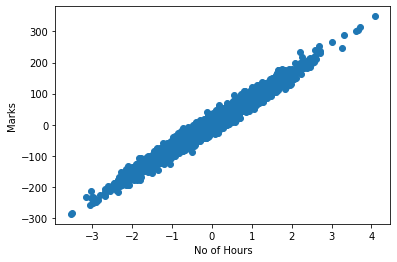

In [42]:
### Dummy Data
plt.scatter(X,y)
plt.xlabel("No of Hours")
plt.ylabel("Marks")
plt.show()

# 3. Linear Regression

In [43]:
def hypothesis(x,theta):
    """
    Documentation:
        x : scalar
        theta : array(2,1)
        returns scalar/prediction  
    """
    return theta[0] + x*theta[1]

In [44]:
def error(X,y,theta):
    """
    Documentation:
    X : np.array
    y : np.array
    theta : array(2,1)
    returns error(scalar)
    """
    m=X.shape[0]
    total_error=0.0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        total_error+=(hx-y[i])**2
    return total_error/(2*m)

In [45]:
def gradients(X,y,theta):
    
    m=X.shape[0]
    grad=np.zeros((2,1))
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*X[i]
    return grad/m

In [69]:
def gradient_descent(X,y,lr=0.1,max_iter=300):
    
    theta=np.random.randint(-1,1,size=(2,1))
    
    error_list=[]
    for i in range(max_iter):
        
        err=error(X,y,theta)
        error_list.append(err[0])
        
        grad=gradients(X,y,theta)
        
        theta[0]=theta[0]-lr*grad[0]
        theta[1]=theta[1]-lr*grad[1]
        
    return (theta,error_list)    


## 4.Model Training

In [70]:
(theta,error_list)=gradient_descent(X,y)

In [71]:
theta

array([[ 0],
       [71]])

In [72]:
error_list[-5:]

[145.969072710862,
 145.969072710862,
 145.969072710862,
 145.969072710862,
 145.969072710862]

<function matplotlib.pyplot.show(close=None, block=None)>

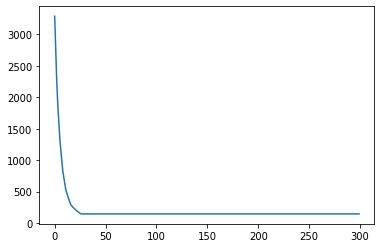

In [73]:
plt.plot(error_list)
plt.show

In [74]:
y_pred=hypothesis(X,theta)

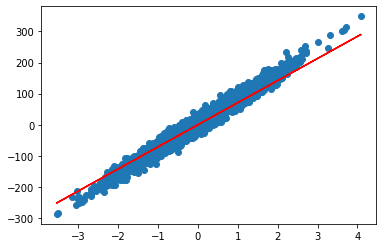

In [75]:
plt.plot(X,y_pred , color='red')
plt.scatter(X,y)

## 5.Test Data

In [77]:
X_test=pd.read_csv('./Test cases/Linear_X_Test.csv').values

In [78]:
X_test.shape

(1250, 1)

In [79]:
y_test_pred=hypothesis(X_test,theta)

In [83]:
df=pd.DataFrame(y_test_pred,columns=['y'])

In [89]:
df.to_csv("./prediction.csv",index=False)

## 6.Evaluation

In [90]:
def r2_score(Y,Y_hat):
    num=np.sum((Y_hat-Y)**2)
    denom=np.sum(( Y.mean()-Y)**2)
    return (1-num/denom)

In [91]:
r2_score(y,y_pred)

0.9556047190715145